In [95]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import numpy as np

In [107]:
data = pd.read_csv('Coal Futures Historical Data.csv', parse_dates=["Date"], index_col="Date")
data.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2018-12-14,76.05,76.05,76.05,76.05,-,-0.39%
2018-12-13,76.35,76.35,76.35,76.35,-,0.00%
2018-12-12,76.35,76.35,76.35,76.35,-,1.33%
2018-12-11,75.35,75.35,75.35,75.35,-,0.94%
2018-12-10,74.65,74.65,74.65,74.65,-,0.00%


In [109]:
data.index

DatetimeIndex(['2018-12-14', '2018-12-13', '2018-12-12', '2018-12-11',
               '2018-12-10', '2018-12-07', '2018-12-06', '2018-12-05',
               '2018-12-04', '2018-12-03',
               ...
               '2015-11-30', '2015-11-27', '2015-11-26', '2015-11-25',
               '2015-11-24', '2015-11-23', '2015-11-20', '2015-11-19',
               '2015-11-18', '2015-11-17'],
              dtype='datetime64[ns]', name='Date', length=789, freq=None)

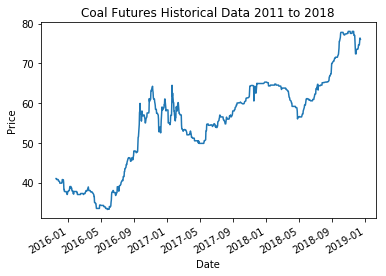

In [146]:
data['Price'].plot()
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Coal Futures Historical Data 2011 to 2018")
plt.show()


In [147]:
#add column
data['Ticks'] = range(0,len(data.index.values))
data.head()

,Price,Open,High,Low,Vol.,Change %,Ticks,Rolling_Mean,Date
Date,,,,,,,,,
2018-12-14,76.05,76.05,76.05,76.05,-,-0.39%,0,NaN,0
2018-12-13,76.35,76.35,76.35,76.35,-,0.00%,1,NaN,1
2018-12-12,76.35,76.35,76.35,76.35,-,1.33%,2,NaN,2
2018-12-11,75.35,75.35,75.35,75.35,-,0.94%,3,NaN,3
2018-12-10,74.65,74.65,74.65,74.65,-,0.00%,4,NaN,4


In [16]:
#https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [142]:
#sampling 1/5 of data
one_fifth = data.sample(frac = .2, random_state=np.random.randint(10))
one_fifth.head()

,Price,Open,High,Low,Vol.,Change %,Ticks,Rolling_Mean,Date
Date,,,,,,,,,
2015-12-01,39.90,39.90,39.90,39.90,-,-0.99%,778,38.086250,778
2018-10-04,77.80,77.80,77.80,77.80,-,0.00%,51,NaN,51
2017-08-23,56.55,56.55,56.55,56.55,-,-0.88%,335,61.613750,335
2017-04-24,50.55,50.55,50.55,50.55,-,0.00%,420,53.838375,420
2016-12-13,58.95,58.95,58.95,58.95,-,-0.17%,511,56.021875,511


In [143]:
#reorder data by ticks
one_fifth.index.name = None
one_fifth = one_fifth.sort_values(by=['Ticks'], ascending=[True])
one_fifth.head()

,Price,Open,High,Low,Vol.,Change %,Ticks,Rolling_Mean,Date
2018-11-20,77.05,77.05,77.05,77.05,-,-1.28%,18,NaN,18
2018-11-02,78.05,78.05,78.05,78.05,-,0.00%,30,NaN,30
2018-10-31,78.05,78.05,78.05,78.05,-,0.00%,32,NaN,32
2018-10-26,77.55,77.55,77.55,77.55,-,0.13%,35,NaN,35
2018-10-22,77.40,77.40,77.40,77.40,-,0.00%,39,NaN,39


Text(0,0.5,'Price')

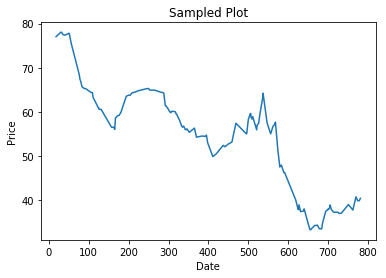

In [148]:
#plot ticks vs closing price for sample data
axes = one_fifth.plot('Date', 'Price', legend = False, title = 'Sampled Plot')
axes.legend = None
axes.set_ylabel('Price')

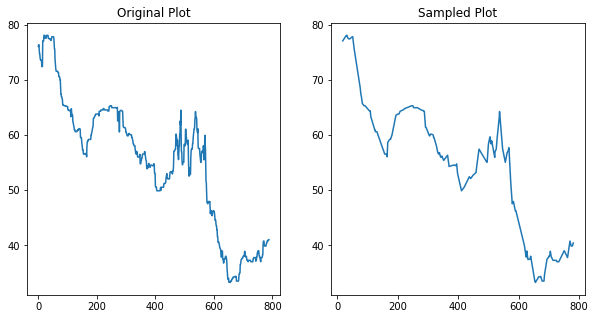

In [149]:
#Plotting Original Data vs Sampled Data (Subplot)
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10,5));
axes[0].plot('Ticks', 'Open', data = data);
axes[0].set_title('Original Plot');
axes[1].plot('Ticks', 'Open', data = one_fifth);
axes[1].set_title('Sampled Plot');

In [150]:
data['Rolling_Mean'] = data['Open'].rolling(window = 80).mean()
data.head(5)

,Price,Open,High,Low,Vol.,Change %,Ticks,Rolling_Mean,Date
Date,,,,,,,,,
2018-12-14,76.05,76.05,76.05,76.05,-,-0.39%,0,NaN,0
2018-12-13,76.35,76.35,76.35,76.35,-,0.00%,1,NaN,1
2018-12-12,76.35,76.35,76.35,76.35,-,1.33%,2,NaN,2
2018-12-11,75.35,75.35,75.35,75.35,-,0.94%,3,NaN,3
2018-12-10,74.65,74.65,74.65,74.65,-,0.00%,4,NaN,4


Text(0.5,1,'Smoothed (Rolling_Mean)')

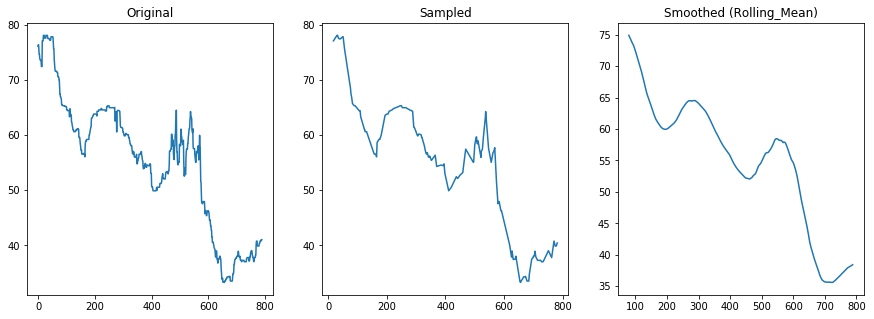

In [151]:
#Plotting Original Data vs Sampled vs Rolling Mean Plot (Subplot)
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (15,5))
axes[0].plot('Ticks', 'Open', data = data)
axes[0].set_title('Original')
axes[1].plot('Ticks', 'Open', data = one_fifth)
axes[1].set_title('Sampled')
axes[2].plot('Ticks', 'Rolling_Mean', data = data)
axes[2].set_title('Smoothed (Rolling_Mean)')

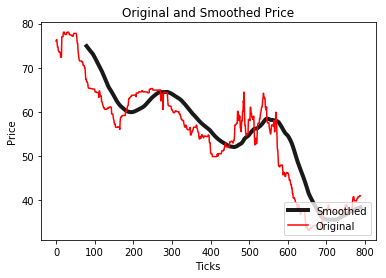

In [152]:
#Plot Original Data and Smoothed Data on Same Plot
fig = plt.figure();
ax = fig.add_subplot(111);
ax.plot(data['Ticks'], data['Rolling_Mean'], color = (0,0,0), linewidth = 4, alpha = .9, label = 'Smoothed');
ax.plot(data['Ticks'], data['Open'], color = (1,0,0), label = 'Original');
ax.set_title('Original and Smoothed Price')
ax.set_xlabel('Ticks')
ax.set_ylabel('Price')
ax.legend(loc='lower right');

In [132]:
#Choosing data between only ticks 100 and 200
filt_data = data[(data['Ticks'] >= 200) & (data['Ticks'] <= 300)]
filt_data.head()

,Price,Open,High,Low,Vol.,Change %,Ticks,Rolling_Mean
Date,,,,,,,,
2018-03-07,63.8,63.8,63.8,63.8,-,0.00%,200,60.025625
2018-03-06,63.8,63.8,63.8,63.8,-,0.00%,201,60.053125
2018-03-05,63.8,63.8,63.8,63.8,-,0.00%,202,60.083125
2018-03-02,63.8,63.8,63.8,63.8,-,0.00%,203,60.118750
2018-03-01,63.8,63.8,63.8,63.8,-,0.00%,204,60.154375


In [153]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(filt_data[['Ticks']], filt_data[['Rolling_Mean']])
m = model.coef_[0]
b = model.intercept_
#equation of the line
print('y = ', round(m[0],2), 'x + ', round(b[0],2))

y =  0.05 x +  49.45


In [154]:
predictions = model.predict(filt_data[['Ticks']])
predictions[0:5]

array([[60.1416828 ],
       [60.19514927],
       [60.24861574],
       [60.30208221],
       [60.35554868]])

In [155]:
predictions = pd.DataFrame(data = predictions, index = filt_data.index.values, columns = ['Pred'])
joined_df = filt_data.join(predictions, how = 'inner')
joined_df.head()

,Price,Open,High,Low,Vol.,Change %,Ticks,Rolling_Mean,Pred
Date,,,,,,,,,
2018-03-07,63.8,63.8,63.8,63.8,-,0.00%,200,60.025625,60.141683
2018-03-06,63.8,63.8,63.8,63.8,-,0.00%,201,60.053125,60.195149
2018-03-05,63.8,63.8,63.8,63.8,-,0.00%,202,60.083125,60.248616
2018-03-02,63.8,63.8,63.8,63.8,-,0.00%,203,60.118750,60.302082
2018-03-01,63.8,63.8,63.8,63.8,-,0.00%,204,60.154375,60.355549


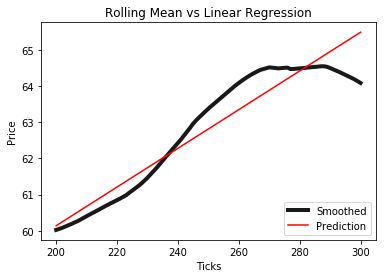

In [136]:
fig = plt.figure();
ax = fig.add_subplot(111);
ax.plot(joined_df['Ticks'], joined_df['Rolling_Mean'], color = (0,0,0), linewidth = 4, alpha = .9, label = 'Smoothed');
ax.plot(joined_df['Ticks'], joined_df['Pred'], color = (1,0,0), label = 'Prediction');
ax.set_title('Rolling Mean vs Linear Regression')
ax.set_xlabel('Ticks')
ax.set_ylabel('Price')
ax.legend(loc='lower right');

In [156]:
import sklearn

r_squared = sklearn.metrics.r2_score(joined_df['Rolling_Mean'],joined_df['Pred'],multioutput='uniform_average')
r_squared

0.9036884804253216